<a href="https://colab.research.google.com/github/EliW7/Diabetes/blob/main/Copy_of_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

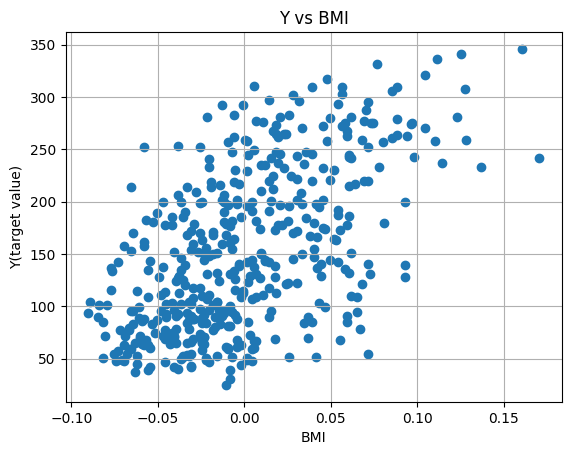

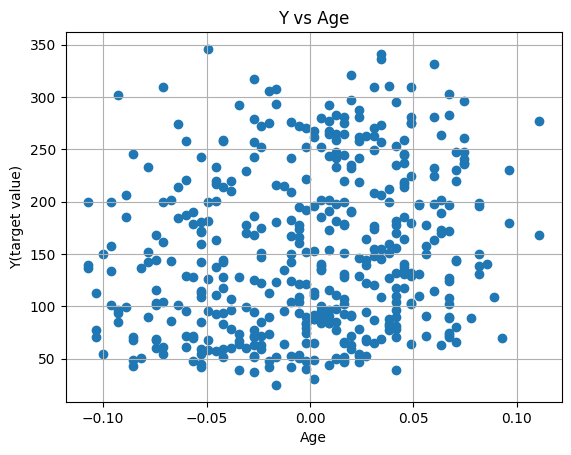

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194906 beta0=152.133484 beta1=714.738259
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320223 beta0=152.133484 beta1=916.137375
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821
RSS per sample = 0.485281
R^2 = 0.514719


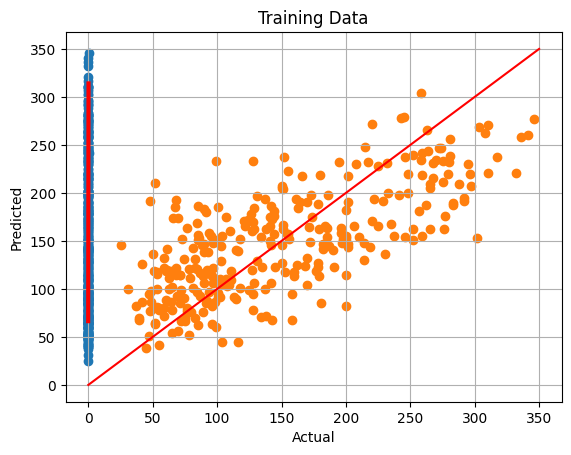

RSS per sample = 0.492804
R^2 = 0.507196


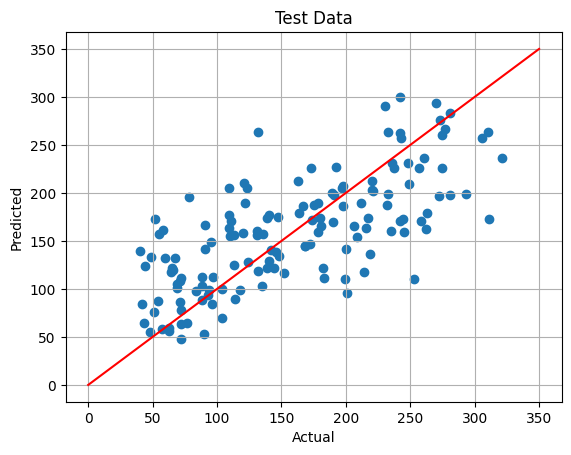

Arrays: [ 152.34779643  -16.57338609 -254.66343751  560.9894609   278.90965232
 -393.45557666   97.08855335  -18.9842756   169.46616165  632.96847103
  114.21833048]
Normalized coefficients: [0.88450337 0.11719203]
Predicted value: [4.55454545 3.34545455]
Actual value: [18. 13.]
Mean Absolute Error: 11.549999999999994
Root Mean Squared Error: 11.704496910755463


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
fn_src = "https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv"
fn_dst = "data.csv"

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert X and y to a DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(diabetes.DESCR)
print(df.head())

xnames = df.columns.tolist()[:-1]
print(xnames)

nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp, natt))

# TODO 1
print("Normalized ages of the first 5 subjects:", X[:5, 0])

# TODO 2
print("Attributes S1-S3 for subjects 10-15:", X[9:15, 2:5])

# TODO 3
plt.scatter(X[:, 2], y)
plt.title("Y vs BMI")
plt.xlabel("BMI")
plt.ylabel("Y(target value)")
plt.grid(True)
plt.show()

plt.scatter(X[:, 0], y)
plt.title("Y vs Age")
plt.xlabel("Age")
plt.ylabel("Y(target value)")
plt.grid(True)
plt.show()

# Copy from demo
ym = np.mean(y)
syy = np.mean((y - ym) ** 2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)

for k in range(natt):
    xm = np.mean(X[:, k])
    sxy = np.mean((X[:, k] - xm) * (y - ym))
    sxx = np.mean((X[:, k] - xm) ** 2)
    beta1[k] = sxy / sxx
    beta0[k] = ym - beta1[k] * xm
    Rsq[k] = (sxy ** 2) / (sxx * syy)
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k, Rsq[k], beta0[k], beta1[k]))

# Find the index of the best predictor
imax = np.argmax(Rsq)

# Regression line over the range of x values
xmin, xmax = np.min(X[:, imax]), np.max(X[:, imax])
ymin, ymax = beta0[imax] + beta1[imax] * xmin, beta0[imax] + beta1[imax] * xmax
plt.plot([xmin, xmax], [ymin, ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(X[:, imax], y)
plt.grid(True)

# Data Splitting
ns_train = 300
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]     # Training data
y_tr = y[:ns_train]       # Corresponding target values

# Train the model
regr = LinearRegression()
regr.fit(X_tr, y_tr)

# Training Predictions
y_tr_pred = regr.predict(X_tr)
RSS_tr = np.mean((y_tr_pred - y_tr) ** 2) / (np.std(y_tr) ** 2)
Rsq_tr = 1 - RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 = {0:f}".format(Rsq_tr))

plt.scatter(y_tr, y_tr_pred)
plt.plot([0, 350], [0, 350], 'r')
plt.title("Training Data")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Test Data Predictions
X_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(X_test)
RSS_test = np.mean((y_test_pred - y_test) ** 2) / (np.std(y_test) ** 2)
Rsq_test = 1 - RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 = {0:f}".format(Rsq_test))

plt.scatter(y_test, y_test_pred)
plt.plot([0, 350], [0, 350], 'r')
plt.title("Test Data")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


ones = np.ones((ns_train, 1))

t = np.zeros((ns_train, natt + 1))
for i in range(ns_train):
    t[i, 0] = 1
    for j in range(natt):
        t[i, j + 1] = X_tr[i, j]

X1 = np.dot(t.T, t)
Y1 = np.dot(t.T, y_tr)
array = np.linalg.solve(X1, Y1)

print("Arrays:", array)

x1 = np.array([0, 1, 3, 5, 4])
x2 = np.array([0, 0.7, 4.3, 15.1, 13.2])
y = np.array([-2, -0.9, 1.5, 18, 13])

#TODO 4
X_tr = np.column_stack((x1[:3], x2[:3]))
y_tr = y[:3]
regr = LinearRegression()
regr.fit(X_tr, y_tr)
coeff_norm = np.zeros(2)
for j in range(2):
    coeff_norm[j] = regr.coef_[j] * np.std(X_tr[:, j]) / np.std(y_tr)
test = np.array([[x1[3], x2[3]]])
print("Normalized coefficients:", coeff_norm)

test = np.column_stack((x1[3:], x2[3:]))
actual = y[3:]
py = regr.predict(test)

print("Predicted value:", py)
print("Actual value:", actual)


MAE = np.mean(np.abs(py - actual))
print("Mean Absolute Error:", MAE)

RMSE = np.sqrt(np.mean((py - actual) ** 2))
print("Root Mean Squared Error:", RMSE)



